#### Fitting of Periodic Data
a)	Create a function that simulates data that takes a periodic function with a form: 
v = a0 + a1t + a2 sin(a4t) + a3 cos(a4t)
You should simulate data at a number of random times over an interval and include Gaussian errors for the data. 
The inputs ai should take the form of a 1-dimensional python array.

In [136]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

def periodic_function(t, a):
    return a[0] + a[1] * np.array(t) + a[2] * np.sin(a[4] * np.array(t)) + a[3] * np.cos(a[4] * np.array(t))

def fit_function(t, a0, a1, a2, a3, a4):
    return a0 + a1 * np.array(t) + a2 * np.sin(a4 * np.array(t)) + a3 * np.cos(a4 * np.array(t))


b)	Setting a0=0, a1=1, a2=1, a3=1 and a4=0, simulate a dataset from times t=20 to t = 35, containing 100 points with Gaussian errors with uncertainty 0.5 

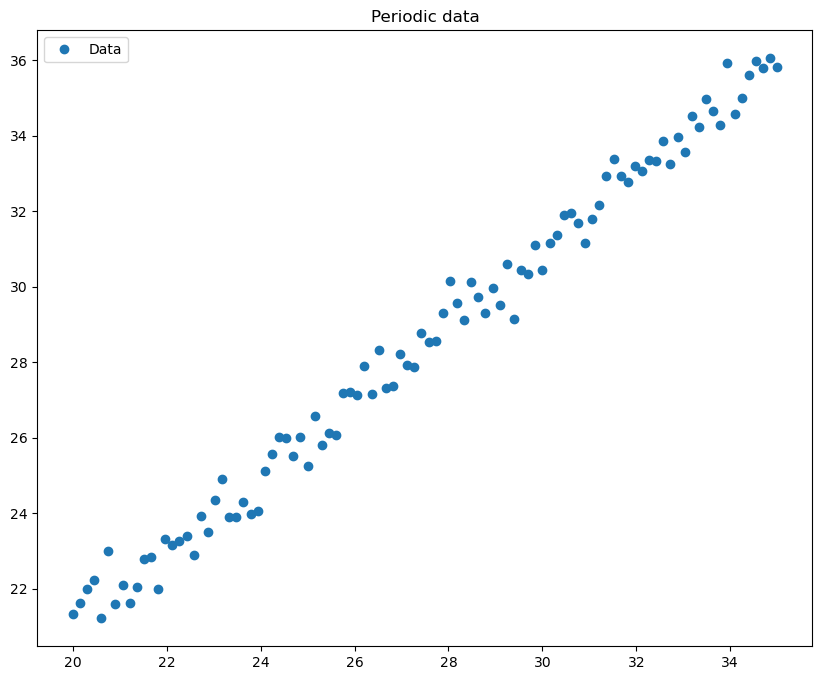

In [137]:
t_low = 20
t_high = 35
n_pts = 100
a = [0, 1, 1, 1, 0]

xi = np.linspace(t_low,t_high,n_pts)
y_random = stats.norm.rvs(size=n_pts,loc=0,scale=0.5)

yi = periodic_function(xi, a) + y_random

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(xi, yi, "o", label="Data")
plt.title("Periodic data")
plt.legend()

c)	 Fit the data with a function of the same form as above.  Do the fit parameters agree, within error, with the expected values?

perr: [3.64806676e+05 5.31484081e+00 6.33282908e+05 3.64812319e+05
 2.26458841e+00]	Chi^2: 21.90390399652549 dof: 95


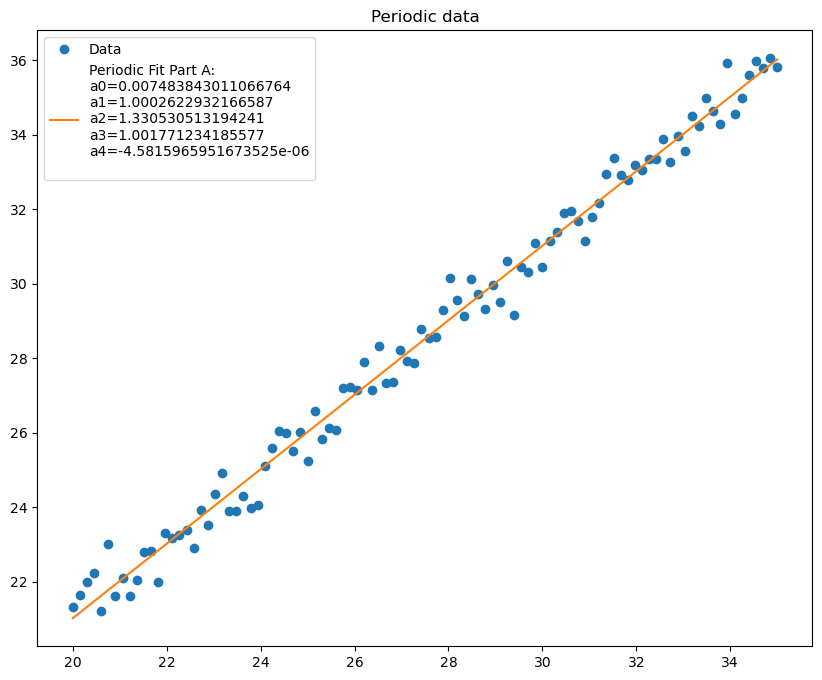

In [165]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(fit_function, xi, yi, p0=[0, 1, 1, 1, 0])
perr = np.sqrt(np.diag(pcov))

fit_x = xi
fit_y = fit_function(fit_x, *popt)
chi2 = sum((yi-fit_y)*(yi-fit_y))

print(f"perr: {perr}\tChi^2: {chi2} dof: {n_pts - 5}")

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Periodic data")
plt.plot(xi, yi, "o", label="Data")
plt.plot(fit_x, fit_y, label=f"Periodic Fit Part A:\na0={popt[0]}\na1={popt[1]}\na2={popt[2]}\na3={popt[3]}\na4={popt[4]}\n")
plt.legend()

d)	Now, define a NEW fitting function (for the same data) as
        v=a0 + a1t + a2 sin(a3t + a4)
	and refit the data and extract the fit parameters, with errors.   
	Does this give better or worse fit?  
	Extra Credit:  Show that the two fits are mathematically equivalent, and then from this calculate the mathematical relationship between the fit parameters and errors of the two fit functions.


[ 7.48384301e-03  1.00026229e+00  1.33053051e+00  1.00177123e+00
 -4.58159660e-06] [1.00929439 1.00025459 0.         0.         0.        ]
[3.64806676e+05 5.31484081e+00 6.33282908e+05 3.64812319e+05
 2.26458841e+00] [inf inf inf inf inf]
A:	perr: [3.64806676e+05 5.31484081e+00 6.33282908e+05 3.64812319e+05
 2.26458841e+00]	Chi^2: 21.90390399652549 dof: 95
D:	perr: [inf inf inf inf inf]	Chi^2: 21.903903987359943 dof: 95


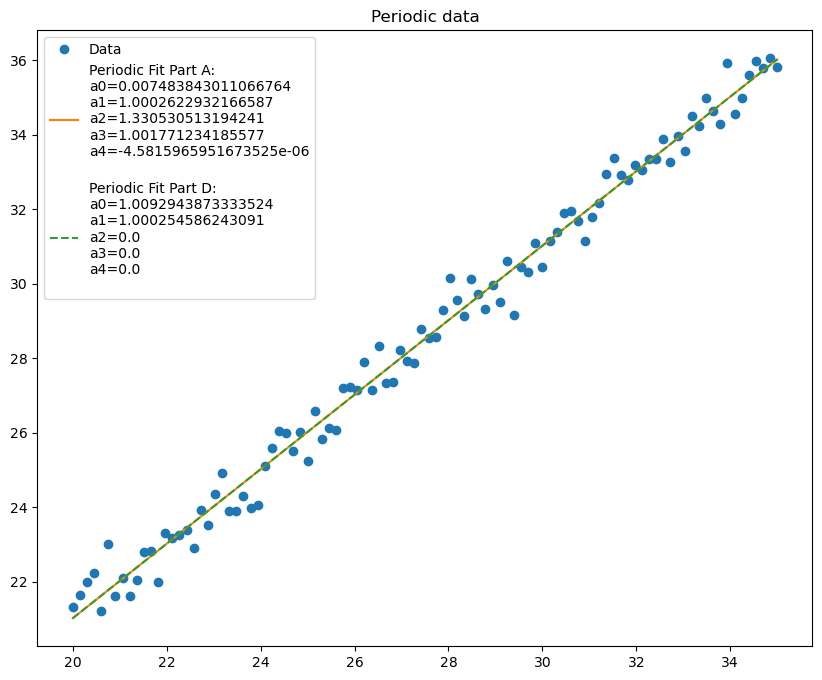

In [166]:
def fit_function_d(t, a0, a1, a2, a3, a4):
    return a0 + a1 * np.array(t) + a2 * np.sin(a3 * np.array(t) + a4)

popt_d, pcov_d = curve_fit(fit_function_d, xi, yi, p0=[0, 0, 0, 0, 0])
perr_d = np.sqrt(np.diag(pcov_d))

fit_d_x = xi
fit_d_y = fit_function_d(fit_d_x, *popt_d)
chi2_d = sum((yi-fit_d_y)*(yi-fit_d_y))

print(popt, popt_d)
print(perr, perr_d)

print(f"A:\tperr: {perr}\tChi^2: {chi2} dof: {n_pts - 5}")
print(f"D:\tperr: {perr_d}\tChi^2: {chi2_d} dof: {n_pts - 5}")

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Periodic data")
plt.plot(xi, yi, "o", label="Data")
plt.plot(fit_x, fit_y, label=f"Periodic Fit Part A:\na0={popt[0]}\na1={popt[1]}\na2={popt[2]}\na3={popt[3]}\na4={popt[4]}\n")
plt.plot(fit_d_x, fit_d_y, "--", label=f"Periodic Fit Part D:\na0={popt_d[0]}\na1={popt_d[1]}\na2={popt_d[2]}\na3={popt_d[3]}\na4={popt_d[4]}\n")
plt.legend()

Does this give better or worse fit?
The difference between the two Chi Square values are 9.16555e^-9. Considering how small the difference is, I believe there is no significant difference between the fits.

Periodic function from part a:
a0 = -2.31896905e-02  
a1 = 1.00175841e+00  
a2 = 1.62849313e+00  
a3 = 8.64516980e-01
a4 = 1.07435644e-05
v = a0 + a1t + a2 sin(a4t) + a3 cos(a4t)
v = a0 + a1t + a2 sin(~0) + a3 cos(~0)
v = ~0 + ~t + ~0 + ~1
v = ~t + ~1

Periodic function from part d:
a0 = 0.8413266
a1 = 1.00177563
a2 = 0
a3 = 0
a4 = 0
v = a0 + a1t + a2 sin(a3t + a4)
v = a0 + a1t + 0 sin(0t + 0)
v = ~1 + ~1*t + 0
v = ~1 + ~t